**Analyzing the Top 100 Streamed Songs in 2018 from Spotify**

The basic premise behind the project was to answer several research based questions.
1. How can I represent the different variables in a way that makes sense.
2. How are the top songs's attributes are related to each other
    *     Are there any trends in the tempo, energy, dancability etc. among the top songs.
3. Is there any patterns to why people streamed these songs?
4. What variables seem to be the most common among the songs
    * The most popular tempo?
    * Most popular keys?
    * etc.


In [3]:
# Import statements used so far
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
plt.style.use('bmh') # I really like bmh but any style works

Now that *that's* over. I am going to read the data in and print the head of the data.

In [4]:
music_df = pd.read_csv('../input/top2018.csv', index_col='name')
print(music_df.head())
# NOTE: In Kaggle, the csv file is read differently than in a Pycharm (in pycharm, it's just top2018.csv)

                                   artists  danceability  energy  key  \
name                                                                    
God's Plan                           Drake         0.754   0.449    7   
SAD!                          XXXTENTACION         0.740   0.613    8   
rockstar (feat. 21 Savage)     Post Malone         0.587   0.535    5   
Psycho (feat. Ty Dolla $ign)   Post Malone         0.739   0.559    8   
In My Feelings                       Drake         0.835   0.626    1   

                              loudness  mode  speechiness  acousticness  \
name                                                                      
God's Plan                      -9.211     1       0.1090        0.0332   
SAD!                            -4.880     1       0.1450        0.2580   
rockstar (feat. 21 Savage)      -6.090     0       0.0898        0.1170   
Psycho (feat. Ty Dolla $ign)    -8.011     1       0.1170        0.5800   
In My Feelings                  -5.833

**Quick Rundown of the Variables:**
* Danceability - how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* Energy - 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* Key - the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* Loudness - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* Mode - indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.
* Speechiness - the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* Acousticness - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* Instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* Liveness - the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* ValenceA measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Tempo - the overall estimated tempo of a track in beats per minute (BPM)
* duration_ms - The duration of the track in milliseconds.
* time_signature - an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

Some of these I'm not going to look at (i.e. liveliness) since they aren't exactly relevant

Since the music duration is not in acutal minutes, I need to convert it.

In [5]:
# converting to normal time/minutes
music_df['Duration_min'] = music_df['duration_ms'] / 60000
print(music_df['Duration_min'])
music_df.drop(columns='duration_ms', inplace=True)


name
God's Plan                           3.316217
SAD!                                 2.776767
rockstar (feat. 21 Savage)           3.635783
Psycho (feat. Ty Dolla $ign)         3.690667
In My Feelings                       3.632083
                                       ...   
Rewrite The Stars                    3.624000
I Miss You (feat. Julia Michaels)    3.429133
No Brainer                           4.333333
Dusk Till Dawn - Radio Edit          3.983333
Be Alright                           3.272883
Name: Duration_min, Length: 100, dtype: float64


Now, I want to use the pandas dataframe to see the number of songs an artist has in the top 100 streamed and to create a quick graph of the top 10.

Post Malone      6
XXXTENTACION     6
Drake            4
Marshmello       3
Ed Sheeran       3
Khalid           2
Selena Gomez     2
Ariana Grande    2
Dua Lipa         2
Migos            2
Name: artists, dtype: int64


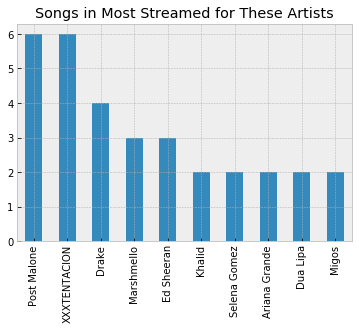

In [6]:
print(music_df['artists'].value_counts().head(10))
# plotting the top ten artists and how many of their songs were in the most streamed
plt.show(music_df['artists'].value_counts().head(10).plot(kind='bar', title='Songs in Most Streamed for These Artists'))

Post Malone and XXX are both tied with 6 songs. XXX also passed away this year which may have led to a surplus of streaming.

Now onto a bit more data analysis.
Next I'm going to define what a 'good' danceability is:

In [7]:
very_dance = music_df['danceability'] >= 0.75
meh_dance = (music_df['danceability'] >= 0.5) & (music_df['danceability'] < 0.75)
not_dance = music_df['danceability'] < 0.5
# the danceability facotr of a song is a factor of both tempo and time signature-->Spotify calculated it as a decimal value

Determining the percentages of songs that make up the categories I had defined

In [8]:
dance_data = [very_dance.sum(), meh_dance.sum(), not_dance.sum()]
Dance = pd.DataFrame(dance_data, columns=['percent'],
                     index=['Very Danceable', 'Regular', 'Not Really'])
print(Dance)

                percent
Very Danceable       43
Regular              53
Not Really            4


A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.

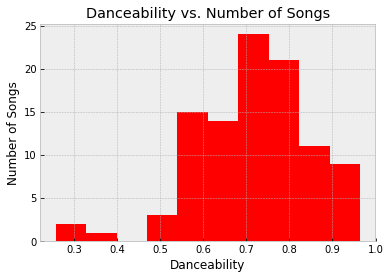

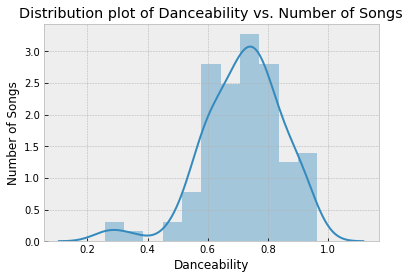

In [9]:
music_df['danceability'].hist(color='red')
plt.title('Danceability vs. Number of Songs')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')
plt.show()

sns.distplot(music_df['danceability'], hist=True, kde=True)
plt.title('Distribution plot of Danceability vs. Number of Songs')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')
plt.show()

In the histograph, it's slightly skewed to the right—indicating that the majority of songs in the top 100 streamed are danceable.

Next, I want to take a look at the energy of the songs to see if there's any correlation between the two. (I'm replicating the process from above—including the defining of the categories)

In [10]:
# Here I'm defining the parameters:
very_energetic = music_df['energy'] >= 0.75
regular_energy = (music_df['energy'] >= 0.5) & (music_df['energy'] < 0.75)
least_energetic = music_df['energy'] < 0.5

In [11]:
# Next, I'm creating the dataframe:
data2 = [very_energetic.sum(), regular_energy.sum(), least_energetic.sum()]
Energy = pd.DataFrame(data2, columns=['percent'],
                      index=['Very Energy', 'Regular Energy', 'Low Energy'])
#And I'm going to print Energy
print(Energy)

                percent
Very Energy          32
Regular Energy       55
Low Energy           13


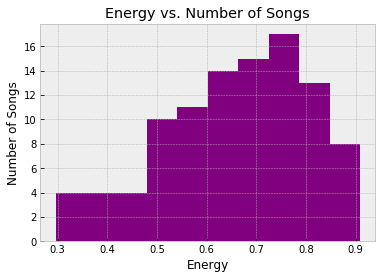

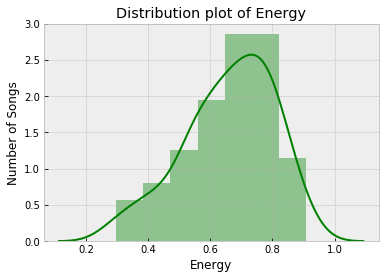

In [12]:
music_df['energy'].hist(color='purple')
plt.title('Energy vs. Number of Songs')
plt.xlabel('Energy')
plt.ylabel('Number of Songs')
plt.show()

sns.distplot(music_df['energy'], hist=True, kde=True, color='green')
plt.title('Distribution plot of Energy')
plt.xlabel('Energy')
plt.ylabel('Number of Songs')
plt.show()

**Now I'm going to go more into depth about the correlation of all the different values in the dataset**

In pandas, there's also a function called .corr()—it basically finds the correlation of the different variables in the dataset (closer to +/- 1 means a stronger positive/negative correlation).

In [13]:
print(music_df.corr())

                  danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.072582 -0.051759  0.015517 -0.058019   
energy               -0.072582  1.000000 -0.136345  0.732719 -0.117555   
key                  -0.051759 -0.136345  1.000000 -0.105309 -0.141568   
loudness              0.015517  0.732719 -0.105309  1.000000 -0.110178   
mode                 -0.058019 -0.117555 -0.141568 -0.110178  1.000000   
speechiness           0.227075 -0.073591  0.019583 -0.252037 -0.150076   
acousticness         -0.134374 -0.421209  0.141590 -0.269742 -0.030028   
instrumentalness     -0.066592  0.093684 -0.136607  0.036248  0.089667   
liveness             -0.038761  0.050542 -0.125443  0.000006  0.024428   
valence               0.413855  0.382434 -0.032622  0.407760 -0.210599   
tempo                -0.195012  0.062272  0.003737 -0.035156 -0.011911   
time_signature        0.119421  0.255235 -0.087096  0.072301 -0.083782   
Duration_min         -0.068368  0.0730

Text(0.5, 1.0, 'The Correlation Between the Variables')

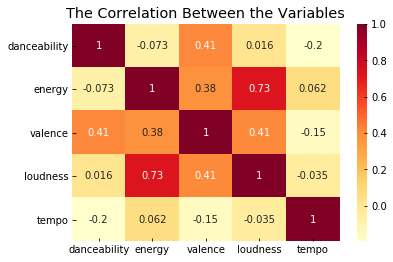

In [14]:
Correlation=music_df[['danceability','energy','valence','loudness','tempo']]
sns.heatmap(Correlation.corr(), annot=True, cmap="YlOrRd")
plt.title("The Correlation Between the Variables")
# Here I'm using a heatmap to see the different values that correlate

Two main variables that piqued my intrest were the loudness versus the energy of a song. So I wanted to plot the correlation of both the two using a joint plot from sns. 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


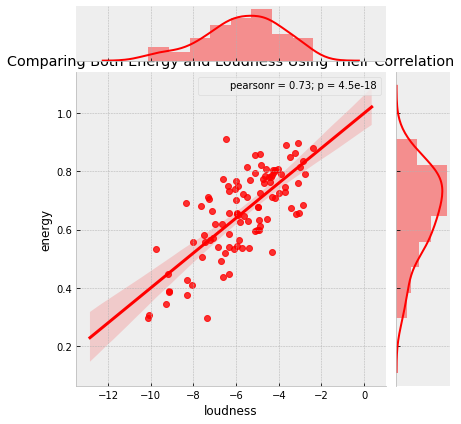

In [15]:
sns.jointplot(data=Correlation, y='energy', x='loudness', kind='reg', stat_func=pearsonr, color='red')
plt.title("Comparing Both Energy and Loudness Using Their Correlation")
plt.show()

As the values of loudness are closer to zero the probability that our song has a high content of rhythms is higher, in general these values should be kept below zero but not very far away.

**Taking a Look at Tempo **

To take a better look into tempo, I want to define the tempo using the bpm (ex. a tempo of about 110bpm is technically considered Allegro—there is always some leeway, too).

In [16]:
music_df['bpm'] = music_df['tempo']
music_df.loc[music_df['tempo'] > 168, 'bpm'] = 'Presto'
music_df.loc[(music_df['tempo'] >= 110) & (music_df['tempo'] <= 168), 'bpm'] = 'Allegro'
music_df.loc[(music_df['tempo'] >= 76) & (music_df['tempo'] <= 108), 'bpm'] = 'Andante'
music_df.loc[(music_df['tempo'] >= 66) & (music_df['tempo'] <= 76), 'bpm'] = 'Adagio'
music_df.loc[music_df['tempo'] < 65, 'bpm'] = 'Largo'

Now to graph tempo and the amount of songs that were classified as such.

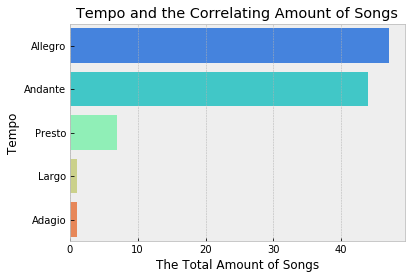

In [17]:
music_df['bpm'].value_counts()
Rhy = music_df['bpm'].value_counts()
Rhy_DF = pd.DataFrame(Rhy)
sns.barplot(x=Rhy_DF.bpm, y=Rhy_DF.index, palette="rainbow")
plt.xlabel('The Total Amount of Songs')
plt.ylabel('Tempo')
plt.title('Tempo and the Correlating Amount of Songs')
plt.show()

With the graph, we can definitely see a lot of the songs in the top 100 are allegro and andante, definitely suggesting that these tempos are used quite a lot.

In [18]:
# Here I want to give the actual values for the amount in each category
music_df['bpm'].value_counts()

Allegro    47
Andante    44
Presto      7
Largo       1
Adagio      1
Name: bpm, dtype: int64

**The Tonality of the Songs**

Now I want to take the time to analyze how the mode of the song (whether it's major or minor) has variables that have more importance or not.

In [19]:
# creating new dataframes seperated by their modes
Major = music_df[music_df['mode'] == 1]
Minor = music_df[music_df['mode'] == 0]

# Using danceability to streamline the data further
MajorD = Major[Major['danceability'] >= 0.5]
MinorD = Minor[Minor['danceability'] >= 0.5]

#Dropping columns that don't have any use (mode we already defined and know because of the dataset's name)
MajorD = Major.drop(columns=['mode', 'time_signature'])
MinorD = Minor.drop(columns=['mode', 'time_signature'])

Next I want to see the correlation of the values in the data and compare them against each other

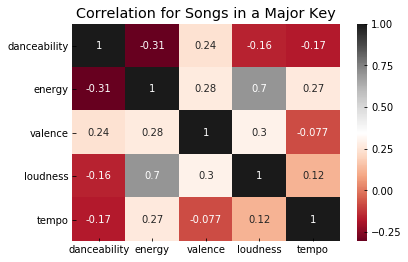

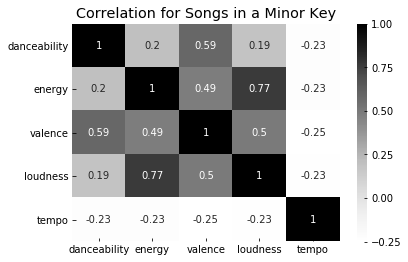

In [23]:
# Here I'm making a dataframe with the variables I want to see correlation in
MajcorD = MajorD[['danceability', 'energy', 'valence', 'loudness', 'tempo']]
MinorcorD = MinorD[['danceability', 'energy', 'valence', 'loudness', 'tempo']]

# Next graphing such values
sns.heatmap(MajcorD.corr(), annot=True, cmap="RdGy")
plt.title('Correlation for Songs in a Major Key')
plt.show()

sns.heatmap(MinorcorD.corr(), annot=True, cmap="Greys")
plt.title('Correlation for Songs in a Minor Key')
plt.show()

Looking at the graphs above there are certain values that correlate a lot more for the different modality. In minor songs, loudness and energy are more closely correlated than that in a Major Key (same with loudness and valence, how happy it sounds)—possibly more minor-sounding songs are much easier to have more freedom versus the restrictive nature of major keys (from a music composition view). There differences in the correlation in the types modes.

Now I want to see how prevalent a key is in the top 100 songs.

In [34]:
# Converting standard Pitch Class notation to the normal letter: 0 = C, 1 = C♯/D♭, 2 = D, and so on.
music_df.loc[ music_df['key'] == 0 ,'key'] ='C'    
music_df.loc[ music_df['key'] == 1 ,'key'] ='C#'    
music_df.loc[ music_df['key'] == 2 ,'key'] ='D'    
music_df.loc[ music_df['key'] == 3 ,'key'] ='D#'    
music_df.loc[ music_df['key'] == 4 ,'key'] ='E'    
music_df.loc[ music_df['key'] == 5 ,'key'] ='F'    
music_df.loc[ music_df['key'] == 6 ,'key'] ='F#'    
music_df.loc[ music_df['key'] == 7 ,'key'] ='G'    
music_df.loc[ music_df['key'] == 8 ,'key'] ='G#'    
music_df.loc[ music_df['key'] == 9 ,'key'] ='A'    
music_df.loc[ music_df['key'] == 10 ,'key'] ='A#' 
music_df.loc[ music_df['key'] == 11 ,'key'] ='B' 

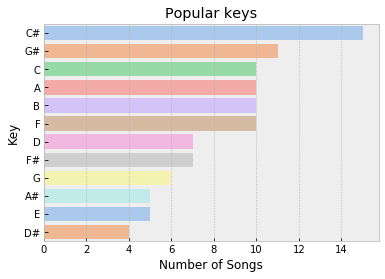

In [35]:
# building the graph with the total value counts
keys = music_df['key'].value_counts()
key_DF = pd.DataFrame(keys)
sns.barplot(x=key_DF.key, y=key_DF.index, palette="pastel")
plt.ylabel('Key')
plt.xlabel('Number of Songs')
plt.title('Popular keys')
plt.show()

Here we see that the most used key was C# and the last was D#. A tad bit surprising given that C# is a harder key to play. However, G# is much easier.